# Aula 1 - Análise de Dados com Pandas


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [7]:
df.shape

(133349, 11)

In [4]:
linhas, colunas = df.shape[0], df.shape[1]
print('Linhas:', linhas)
print('Colunas:', colunas)

Linhas: 133349
Colunas: 11


In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Renomeando as colunas do DataFrame

In [5]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


### Analisando quais sãos as categorias das colunas categóricas

#### Nível de senioridade

In [6]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df['senioridade'].value_counts()

SE    77241
MI    40465
EN    12443
EX     3200
Name: senioridade, dtype: int64

| Sigla | Significado | Descrição                                 |
|-------|-------------|--------------------------------------------|
| SE    | Senior      | Profissional experiente (nível sênior)     |
| MI    | Mid         | Nível intermediário                        |
| EN    | Entry       | Iniciante ou júnior (entry-level)          |
| EX    | Executive   | Executivo, liderança sênior (C-Level)      |


#### Tipo de contrato

In [12]:
df['contrato'].value_counts()

FT    132563
CT       394
PT       376
FL        16
Name: contrato, dtype: int64

| Sigla | Significado  | Descrição                                                           |
|-------|--------------|----------------------------------------------------------------------|
| FT    | Full-time    | Tempo integral – trabalho padrão de 40h/semana ou período completo   |
| PT    | Part-time    | Meio período – carga horária reduzida                                |
| CT    | Contract     | Contrato temporário ou por projeto – geralmente por prazo determinado|
| FL    | Freelance    | Freelancer – trabalho autônomo ou por demanda, sem vínculo formal    |


#### Regime de trabalho

In [13]:
df['remoto'].value_counts()

0      105312
100     27718
50        319
Name: remoto, dtype: int64

O modelo remoto permite trabalhar de qualquer lugar sem precisar ir à empresa. O modelo presencial exige ir até o escritório todos os dias. O híbrido mistura os dois modelos. O modelo 'everywhere' é mais raro e permite trabalhar de qualquer lugar do mundo sem restrição de país ou cidade.

| Sigla | Significado |
|-------|-------------|
| 0     | Presencial  |
| 100   | Remoto      |
| 50    | Híbrido     |

#### Tamanho da empresa

In [14]:
df['tamanho_empresa'].value_counts()

M    129561
L      3574
S       214
Name: tamanho_empresa, dtype: int64

| Sigla | Significado  | Descrição                                                           |
|-------|--------------|----------------------------------------------------------------------|
| M   | Medium    | Empresa de tamanho médio|
| L    | Large    | Empresa de tamanho grande                                |
| S    | Small    | Empresa de tamanho pequeno|


### Modificando o nome das categorias:

In [7]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

senior       77241
pleno        40465
junior       12443
executivo     3200
Name: senioridade, dtype: int64

In [8]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

integral      132563
contrato         394
parcial          376
freelancer        16
Name: contrato, dtype: int64

In [9]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M': 'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

media      129561
grande       3574
pequena       214
Name: tamanho_empresa, dtype: int64

In [10]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()

presencial    105312
remoto         27718
hibrido          319
Name: remoto, dtype: int64

In [11]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Podemos também resumir as informações categóricas com o método `describe()`, exibindo a quantidade de categorias únicas, qual é categoria mais frequente e sua respectiva frequência:

In [20]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [21]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


Com isso já conseguimos responder algumas perguntas, como:

* Qual o nível de experiência mais comum na base de dados?
* Qual é o tipo de contrato mais frequente?
* Qual o cargo mais frequente na amostra?
* De qual país são a maioria dos profissionais da base?
* Qual é o país onde mais empresas da amostra estão sediadas?
* Qual o regime de trabalho mais comum?
* Qual é o tamanho mais comum das empresas na amostra?

**O código é um passo a passo para entender, limpar e preparar a base de dados para análises mais profundas, facilitando a visualização de padrões e tendências no mercado de trabalho em ciência de dados.**

# Aula 2

In [13]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [12]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [15]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [22]:
df[df['ano'].isnull()]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


In [20]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


In [23]:
df_cleaned = df.dropna()

In [24]:
df_cleaned.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [25]:
df_cleaned.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [27]:
df_cleaned = df_cleaned.assign(ano = df_cleaned['ano'].astype('int64'))

In [28]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


# Aula 3

In [29]:
df_cleaned.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


<Axes: title={'center': 'Distribuição de Senioridade'}>

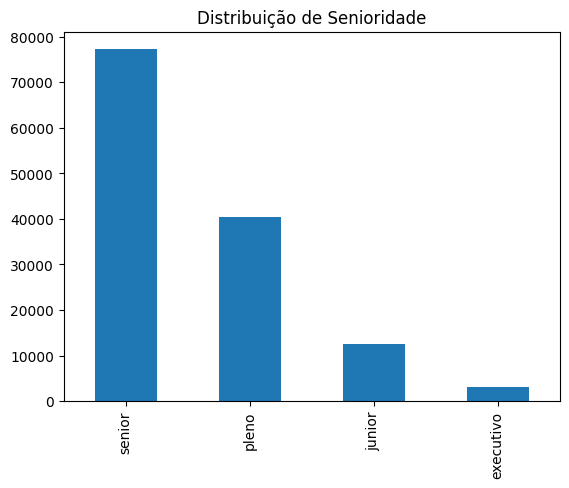

In [32]:
df_cleaned['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')

In [33]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

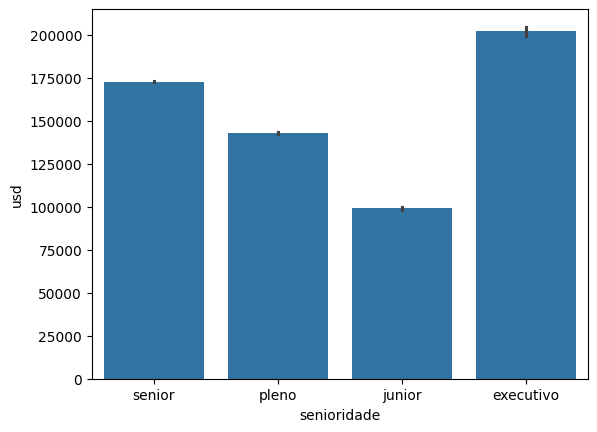

In [34]:
sns.barplot(data=df_cleaned, x='senioridade', y='usd')

In [35]:
import matplotlib.pyplot as plt

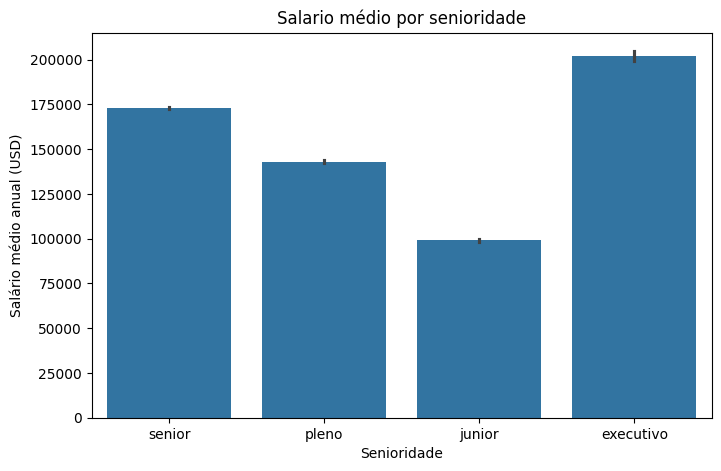

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_cleaned, x='senioridade', y='usd')
plt.title('Salario médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

In [ ]:
df_cleaned.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

senioridade
executivo    202027.667813
senior       172850.838301
pleno        143044.845979
junior        99034.963267
Name: usd, dtype: float64

In [39]:
order = df_cleaned.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
order

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='senioridade')

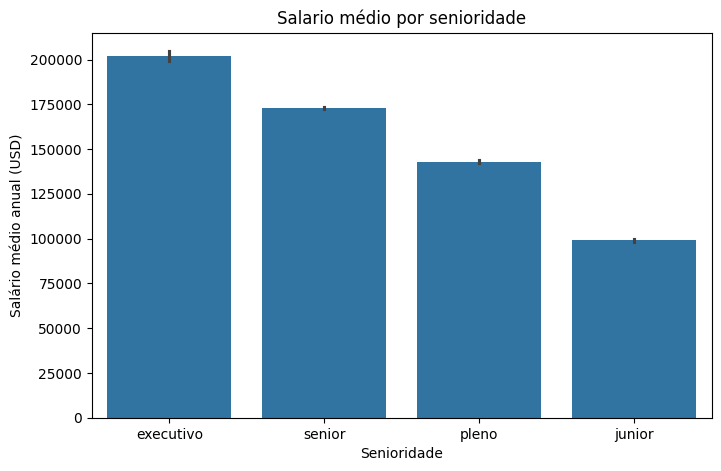

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_cleaned, x='senioridade', y='usd', order=order)
plt.title('Salario médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

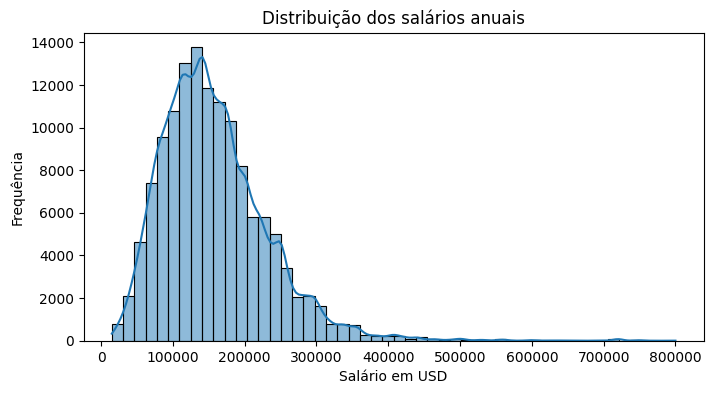

In [46]:
plt.figure(figsize=(8,4))
sns.histplot(x=df_cleaned['usd'], bins = 50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

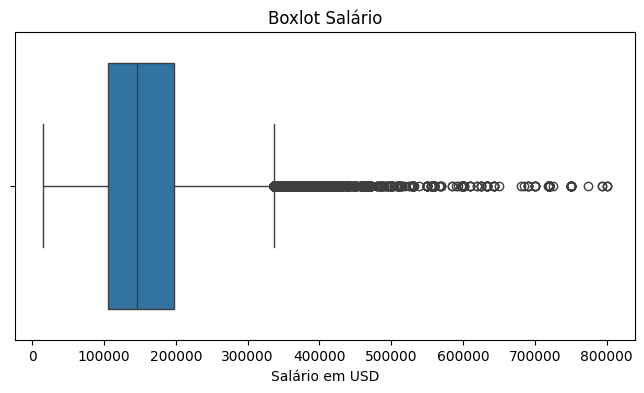

In [48]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_cleaned['usd'])
plt.title('Boxlot Salário')
plt.xlabel('Salário em USD')
plt.show()

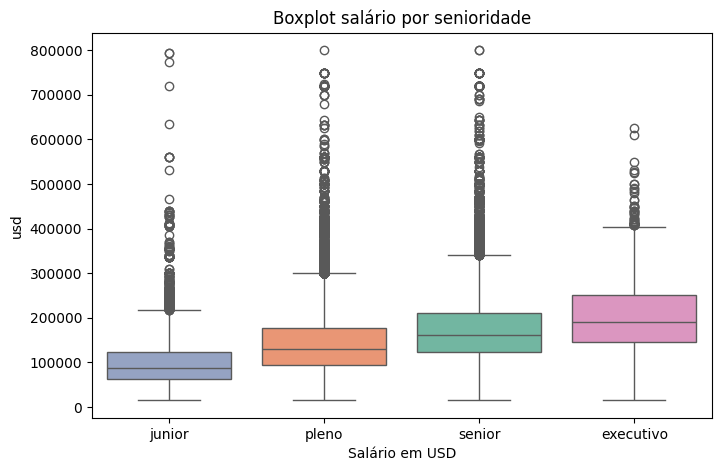

In [53]:
order_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_cleaned, order=order_senioridade, palette='Set2', hue='senioridade')
plt.title('Boxplot salário por senioridade')
plt.xlabel('Salário em USD')
plt.show()

In [54]:
import plotly.express as px

In [57]:
media_salarial = df_cleaned.groupby('senioridade')['usd'].mean().reindex(['junior', 'pleno', 'senior', 'executivo'])

fig = px.bar(
    media_salarial,
    x=media_salarial.index,
    y=media_salarial.values,
    labels={'x': 'Senioridade', 'y': 'Salário médio anual (USD)'},
    title='Salário médio anual por senioridade'
)
fig.show()

In [59]:
remoto_count = df_cleaned['remoto'].value_counts().reset_index()
remoto_count.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_count,
             names='tipo_trabalho',
            values='quantidade',
            title='Proporção dos tipos de trabalho'

)

fig.show()

In [61]:
remoto_count = df_cleaned['remoto'].value_counts().reset_index()
remoto_count.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_count,
             names='tipo_trabalho',
            values='quantidade',
            title='Proporção dos tipos de trabalho',
            hole=0.5
)
fig.update_traces(textinfo='percent+label')
fig.show()

In [64]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [75]:
data_scientists = df_cleaned[df_cleaned['cargo'].str.contains('Data Scientist', case=False, na=False)]
salary_country = data_scientists.groupby('residencia')['usd'].mean().reset_index()
salary_country.columns = ['country', 'mean_salary']

salary_country = salary_country.sort_values('mean_salary', ascending=True)

fig = px.bar(
    salary_country,
    x=salary_country['country'],
    y=salary_country['mean_salary'],
    labels={'x': 'País', 'y': 'Salário médio anual (USD)'},
    title='Salário médio anual por país'
)

fig.show()

In [67]:
df_cleaned[df_cleaned['cargo'].str.contains('Data Scientist', case=False, na=False)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
6,2025,senior,integral,Data Scientist,185000,USD,185000,US,presencial,US,media
7,2025,senior,integral,Data Scientist,148000,USD,148000,US,presencial,US,media
8,2025,pleno,integral,Data Scientist,135000,USD,135000,CA,presencial,CA,media
9,2025,pleno,integral,Data Scientist,108000,USD,108000,CA,presencial,CA,media
65,2025,senior,integral,Data Scientist,258000,USD,258000,US,presencial,US,media
...,...,...,...,...,...,...,...,...,...,...,...
133340,2021,pleno,integral,Data Scientist,160000,SGD,119059,SG,remoto,IL,media
133344,2020,senior,integral,Data Scientist,412000,USD,412000,US,remoto,US,grande
133345,2021,pleno,integral,Principal Data Scientist,151000,USD,151000,US,remoto,US,grande
133346,2020,junior,integral,Data Scientist,105000,USD,105000,US,remoto,US,pequena


In [72]:
data_scientists = df_cleaned[df_cleaned['cargo'].str.contains('Data Scientist', case=False, na=False)]
data_scientists.groupby('residencia')['usd'].mean().reset_index()
salary_country.columns = ['país', 'salário médio anual (USD)']
salary_country

,país,salário médio anual (USD)
0,AD,50745.000000
1,AE,115000.000000
2,AR,42000.000000
3,AT,50975.213115
4,AU,109900.882353
5,BE,66790.750000
6,BG,152500.000000
7,BR,73720.909091
8,CA,140380.066540
9,CH,154315.142857


In [76]:
import pycountry

In [77]:
def iso2_to_iso3(code):
    try: 
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

df_cleaned['residencia_iso3'] = df_cleaned['residencia'].apply(iso2_to_iso3)

df_ds = df_cleaned[df_cleaned['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio anual de Cientista de Dados por país',
                    labels={'usd': 'Salário médio anual (USD)', 'residencia_iso3': 'País'},)

fig.show()

In [78]:
df_cleaned.to_csv('dados-imersao-final.csv', index=False)